In [5]:
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("Crop_recommendation.csv")

In [7]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
2,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
3,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
4,74,35,40,26.491096,80.158363,6.980401,242.864034,rice


In [8]:
data.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [9]:
data.shape

(2200, 8)

In [10]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.isnull().sum() #you can remove the null values or you can replace them with  median of the column

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [14]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [15]:
data.nunique() #check what is the unique values inside the data

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [16]:
data['label'].value_counts()

label
maize          100
rice           100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [17]:
crop_summary=pd.pivot_table(data,index=['label'],aggfunc='mean')
crop_summary # give me the label and mean of all the columns

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [18]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [19]:
import plotly.express as px
fig=px.box(data,y="N",points="all")
fig.show()
# finding the outliers

In [20]:
fig=px.box(data, y="P",points="all")
fig.show()

In [21]:
fig=px.box(data, y="K",points="all")
fig.show()

In [22]:
fig=px.box(data, y="temperature",points="all")
fig.show()

In [23]:
fig=px.box(data, y="humidity",points="all")
fig.show()

In [24]:
fig=px.box(data, y="ph",points="all")
fig.show()

In [25]:
fig=px.box(data, y="rainfall",points="all")
fig.show()

In [26]:
#detect and remove the outliers

df_boston= data
df_boston.columns=df_boston.columns
df_boston.head()

'''Detection'''

#IQR
Q1=np.percentile(df_boston['rainfall'],25,interpolation='midpoint')
Q3=np.percentile(df_boston['rainfall'],75,interpolation='midpoint')

IQR=Q3-Q1
print("Old Shape",df_boston.shape)
#upper bound
upper=np.where(df_boston['rainfall']>=(Q3+1.5*IQR))

#lower bound
lower=np.where(df_boston['rainfall']<=(Q1-1.5*IQR))

#removing the outliers
df_boston.drop(upper[0],inplace=True)
df_boston.drop(lower[0],inplace=True)
print("New Shape:",df_boston.shape)


Old Shape (2200, 8)
New Shape: (2101, 8)


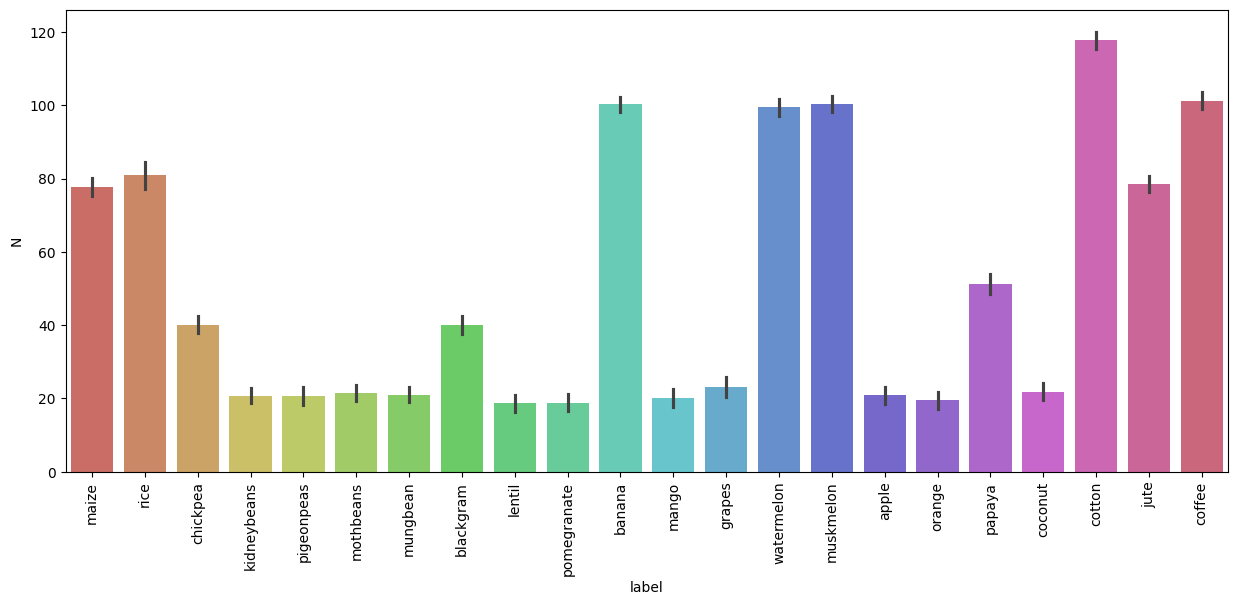

In [27]:
data=df_boston
plt.figure(figsize=(15,6))
sns.barplot(y="N",x="label",data=data,palette="hls")
plt.xticks(rotation=90)
plt.show()

In [28]:
from plotly.subplots import make_subplots
crop_summary_new=data.copy()
fig1=px.bar(crop_summary_new,x="label",y="humidity")
fig1.show()

In [29]:
import random
from IPython.core.display import update_display
data.loc[:, data.columns != 'label'].corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.237127,-0.139970,0.041633,0.189609,0.099238,0.003231
P,-0.237127,1.000000,0.737806,-0.133415,-0.111730,-0.146018,-0.046656
K,-0.139970,0.737806,1.000000,-0.165188,0.198119,-0.174559,-0.042466
temperature,0.041633,-0.133415,-0.165188,1.000000,0.203789,-0.021339,-0.039570
humidity,0.189609,-0.111730,0.198119,0.203789,1.000000,-0.005955,0.020846
ph,0.099238,-0.146018,-0.174559,-0.021339,-0.005955,1.000000,-0.127166
rainfall,0.003231,-0.046656,-0.042466,-0.039570,0.020846,-0.127166,1.000000


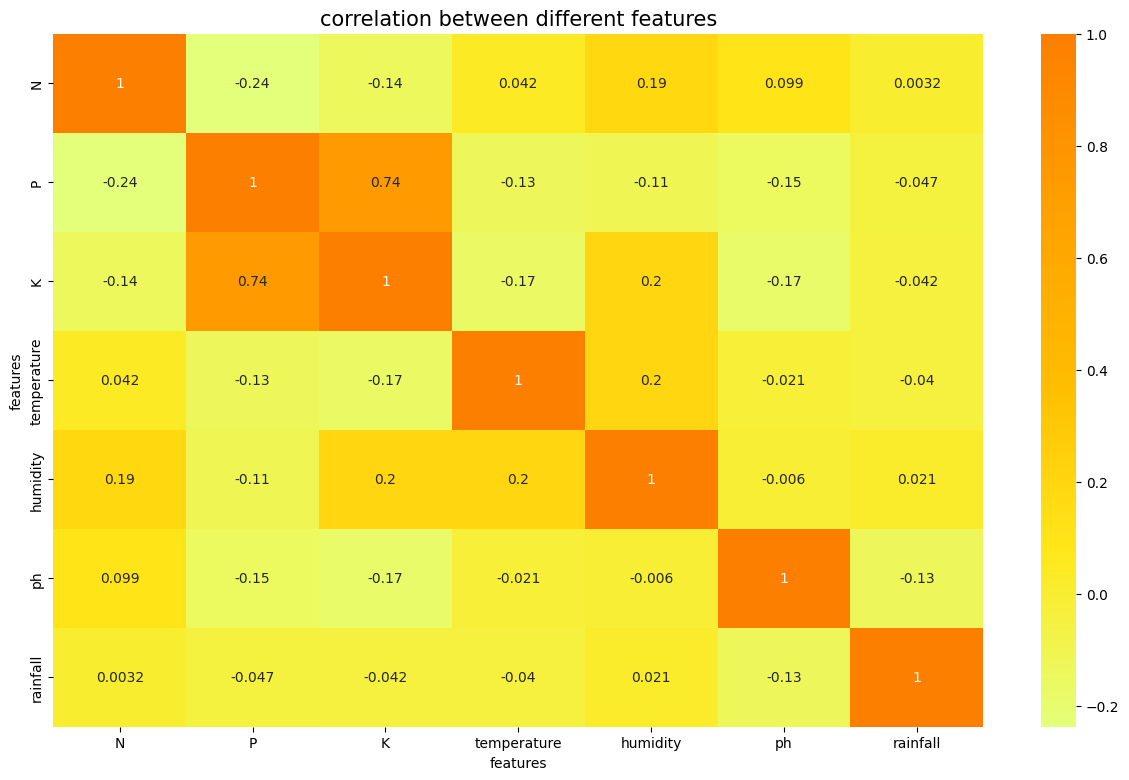

In [30]:
fig,ax=plt.subplots(1,1,figsize=(15,9))
sns.heatmap(data.loc[:, data.columns != 'label'].corr(),annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
x=data.drop('label',axis=1)
y=data['label']
plt.title('correlation between different features',fontsize=15,c='black')
plt.show()

In [31]:
x=data.drop('label',axis=1)
y=data['label']


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,shuffle=True,random_state=0)

In [33]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 1470, number of used features: 7
[LightGBM] [Info] Start training from score -3.030338
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.103363
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.088325
[LightGBM] [Info] Start training from score -2.949212
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.058911
[LightGBM] [Info] Start training from score -3.088325
[LightGBM] [Info] Start training from score -3.030338
[LightGBM] [Info] Start training from score -3.016352
[

LGBMClassifier()

In [34]:
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

LightGBM Model accuracy score: 0.9952


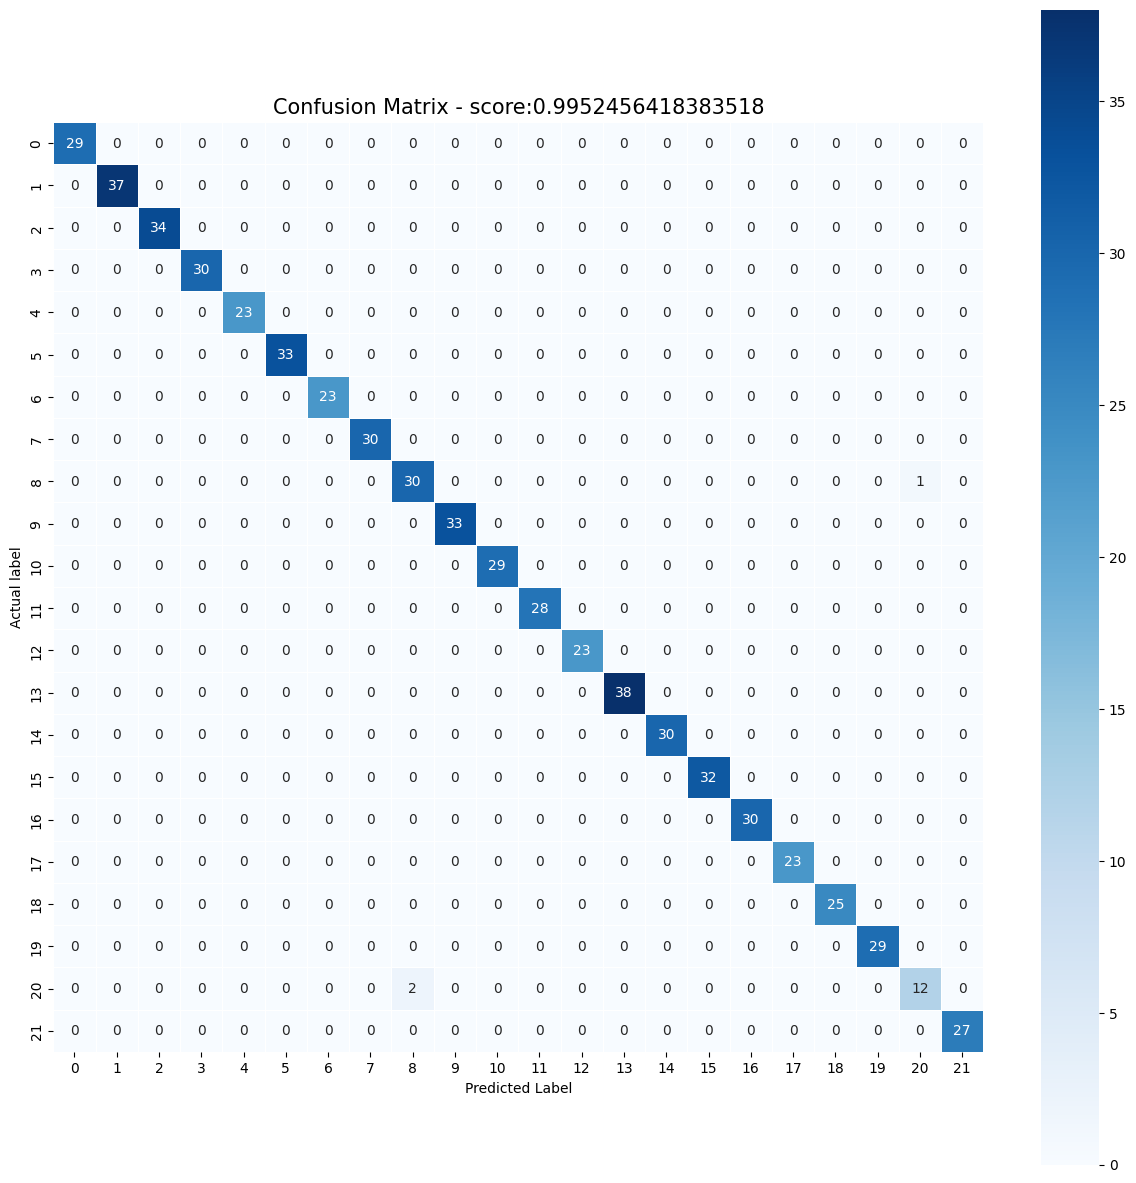

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True, fmt =".0f",linewidths=.5,square=True,cmap="Blues");
plt.ylabel('Actual label');
plt.xlabel('Predicted Label');
all_sample_title='Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title,size=15);
plt.show()


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       1.00      1.00      1.00        34
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        30
        jute       0.94      0.97      0.95        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        29
       maize       1.00      1.00      1.00        28
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       1.00    

In [37]:

from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [38]:
Classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
y_pred=Classifier.predict(x_test)

In [40]:

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Decision TRee Model accuracy Score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))


Decision TRee Model accuracy Score: 0.9873


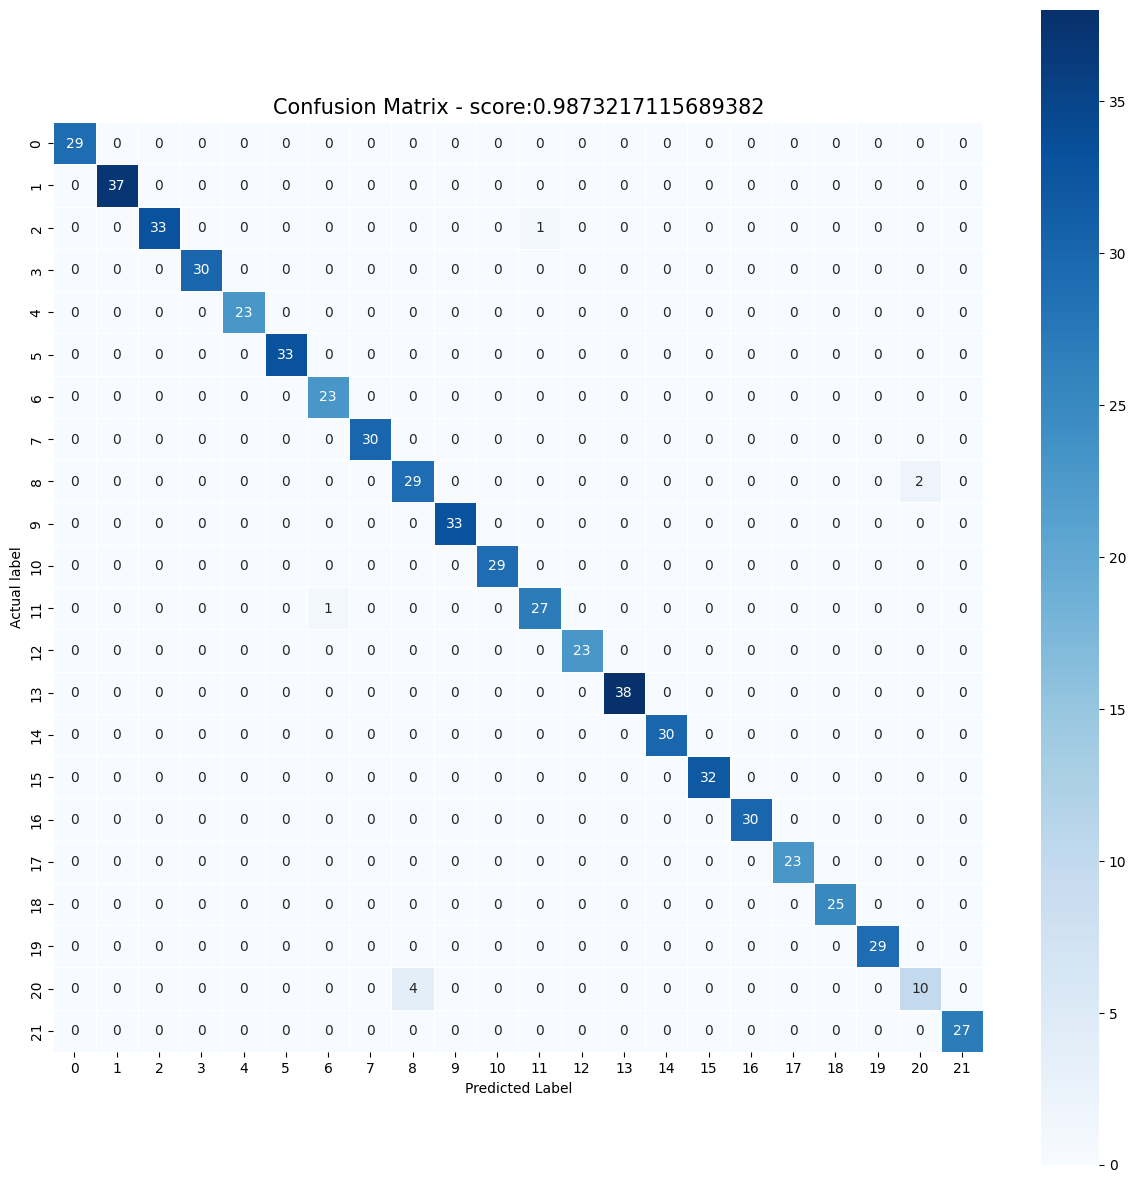

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True, fmt =".0f",linewidths=.5,square=True,cmap="Blues");
plt.ylabel('Actual label');
plt.xlabel('Predicted Label');
all_sample_title='Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title,size=15);
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression
classifier_lr=LogisticRegression(random_state=0)
classifier_lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [43]:
y_pred=classifier_lr.predict(x_test)


In [44]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print ('Logistic Regression Model Accuracy Score:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Logistic Regression Model Accuracy Score:0.9493


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       0.87      0.79      0.83        34
    chickpea       1.00      1.00      1.00        30
     coconut       0.92      1.00      0.96        23
      coffee       1.00      1.00      1.00        33
      cotton       0.78      0.91      0.84        23
      grapes       1.00      1.00      1.00        30
        jute       0.88      0.94      0.91        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       0.88      1.00      0.94        29
       maize       0.81      0.79      0.80        28
       mango       1.00      1.00      1.00        23
   mothbeans       0.91      0.76      0.83        38
    mungbean       0.97      1.00      0.98        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       0.95    

In [46]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
1203,36,125,196,37.465668,80.659687,6.155261,66.838723
1353,82,23,49,26.813836,87.219869,6.873284,51.704978
1385,92,20,55,25.104748,87.526762,6.587791,59.265194
1239,20,122,204,11.797647,80.863254,6.487370,65.069625
1697,6,7,7,27.681673,94.473169,7.199106,113.999515
...,...,...,...,...,...,...,...
1549,19,122,202,23.344674,90.379815,5.811975,112.895402
1951,100,40,20,22.451460,76.256749,7.432044,86.849987
1832,38,14,30,26.924495,91.201060,5.570745,194.902214
832,2,78,23,21.318521,66.439346,7.320515,45.426168


In [47]:
result =Classifier.predict([[104,18,30,23.60301571,60.39647474,6.779832611000002,140.9370415]])
result


array(['coffee'], dtype=object)

In [48]:
y_test[0:1]


1203    grapes
Name: label, dtype: object